## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing Dataset

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df_ = pd.read_csv(r'diabetes.csv')
df = df_.copy()

TARGET = 'Outcome'

## Task 1: Exploratory Data Analytics

### Step 1:  Examine the overall picture.

In [3]:
def check_df(dataframe, head = 5):

    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### nunique #####################")
    print(dataframe.nunique())

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1

### Step 2: Capture numeric and categorical variables.

In [4]:
def grab_col_names(dataframe, target, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.   

    Parameters
    ------
        dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
        target: str
                Dependent (target) variable

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols_mask = [col for col in dataframe.columns if dataframe[col].dtypes == "O"
                     and dataframe[col].nunique() < car_th and col != target]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O"
                   and dataframe[col].nunique() < cat_th and col != target]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   col not in cat_cols_mask and col != target]

    cat_cols = cat_cols_mask + num_but_cat

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"
                and col not in num_but_cat and col != target]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df, TARGET, cat_th=20)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 7
cat_but_car: 0
num_but_cat: 1


### Step 3: Analyze numeric and categorical variables.

Numerical columns:

In [5]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [6]:
df[num_cols].isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Categorical columns:

In [7]:
df[cat_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.0,17.0


In [8]:
df[cat_cols].isnull().sum()

Pregnancies    0
dtype: int64

### Step 4: Analyze the target variable (mean of the target variable according to categorical variables, mean of the numeric variables relative to the target variable)

In [9]:
df.groupby(cat_cols)[TARGET].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [10]:
df.groupby(TARGET)[num_cols].mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Step 5: Conduct outlier analysis.

In [11]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    '''
    This function calculates the lower and upper bounds for identifying outliers in a specified column of a DataFrame.

    Parameters:
    dataframe: The DataFrame containing the data.
    col_name: The name of the column for which you want to calculate outlier thresholds.
    q1 (default 0.25): The lower quartile (25th percentile) value used to calculate the lower limit.
    q3 (default 0.75): The upper quartile (75th percentile) value used to calculate the upper limit.
    '''

    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name, print_values=False):
    '''
    This function checks for outliers in a specified column of a DataFrame using the thresholds calculated by the outlier_thresholds function.

    Parameters:
    dataframe: The DataFrame containing the data.
    col_name: The name of the column to check for outliers.
    print_values (default False): A boolean flag indicating whether to print the actual outlier values if any are found.
    '''

    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) |
                 (dataframe[col_name] < low_limit)].any(axis=None):
        if print_values:
            print(f'Values with higher values than upper limit in {col_name}:\n'
                  f'{dataframe.loc[dataframe[col_name] > up_limit, col_name]}\n')
            print(f'Values with lower values than lower limit in {col_name}:\n'
                  f'{dataframe.loc[dataframe[col_name] < low_limit, col_name]}\n',)
        else:
            print(f'There is outlined data in {col_name}')
        return True
    else:
        print(f'There is no outlined data in {col_name}')
        return False

In [12]:
for col in df.columns:
    check_outlier(df, col, print_values=True)

Values with higher values than upper limit in Pregnancies:
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64

Values with lower values than lower limit in Pregnancies:
Series([], Name: Pregnancies, dtype: int64)

Values with higher values than upper limit in Glucose:
Series([], Name: Glucose, dtype: int64)

Values with lower values than lower limit in Glucose:
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

Values with higher values than upper limit in BloodPressure:
43     110
84     108
106    122
177    110
362    108
549    110
691    114
Name: BloodPressure, dtype: int64

Values with lower values than lower limit in BloodPressure:
7       0
15      0
18     30
49      0
60      0
78      0
81      0
125    30
172     0
193     0
222     0
261     0
266     0
269     0
300     0
332     0
336     0
347     0
357     0
426     0
430     0
435     0
453     0
468     0
484     0
494     0
522     0
533     0
535     0
589     0
597    2

### Step 6: Analyze missing observations.

In [13]:
def missing_values_table(dataframe, na_name=False):
    '''
    This Python function, missing_values_table, is designed to provide a summary of missing values in a DataFrame

    Parameters:
    dataframe: The DataFrame for which you want to analyze missing values.
    na_name (default False): A boolean flag that, when set to True, returns a list of column names with missing values.
    '''
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [14]:
missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

### Step 7: Conduct correlation analysis.

<AxesSubplot:>

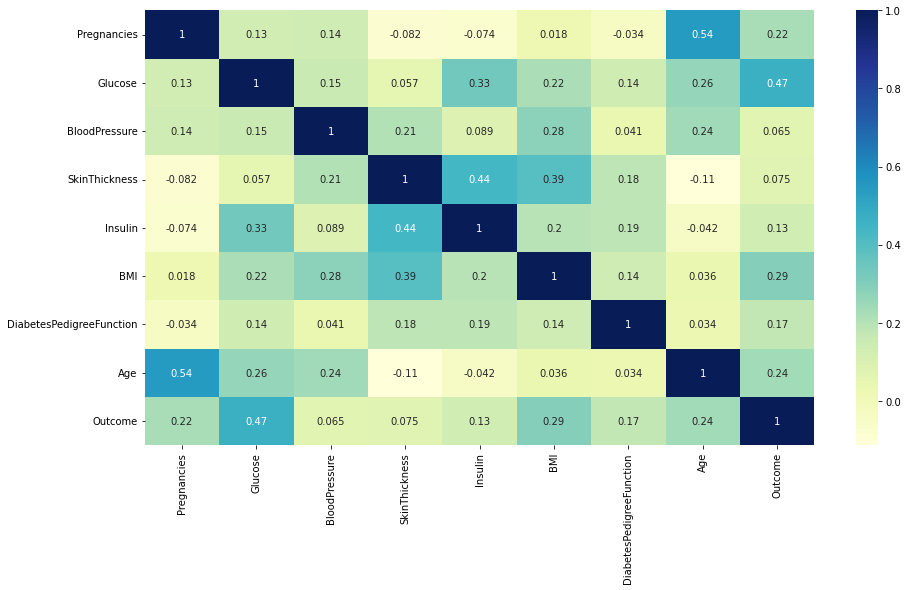

In [15]:
# plotting correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [16]:
# Correlation with the target value
df.corr()[TARGET]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## Task 2 : Feature Engineering

### Step 1: Take necessary actions for missing and outliers. 

There are no missing observations in the data set, but observation units with 0 values in Glucose, Insulin, etc. observation units containing a value of 0 in variables such as Glucose, Insulin, etc. may represent a missing value.

In [17]:
for col in df.columns:
    if df[df[col] == 0].any(axis=None) and col != 'Pregnancies' and col != 'Outcome':
        df.loc[df[col] == 0, col] = np.nan

In [18]:
columns_with_miss = missing_values_table(df, na_name=True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


<AxesSubplot:>

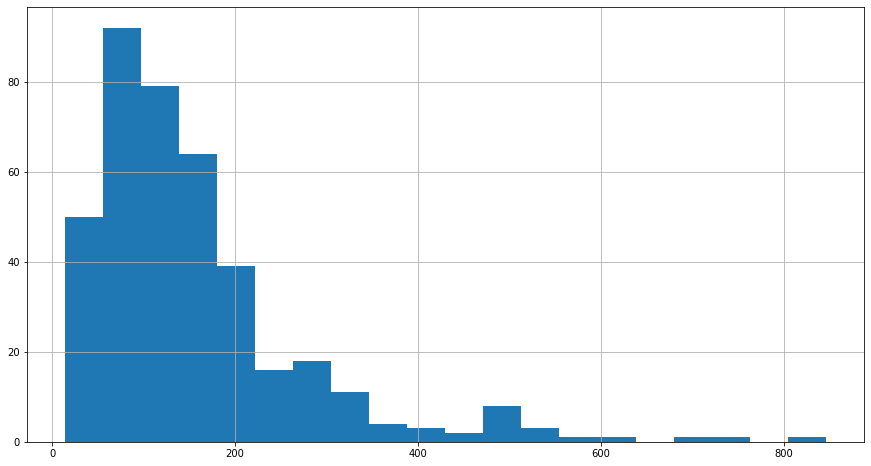

In [19]:
plt.figure(figsize=(15, 8))
df['Insulin'].hist(bins=20)

When we look at the insulin values, we see a left skewed data distribution, so it would make sense to fill in the missing data with the median.

In [20]:
df["Insulin"].fillna(df["Insulin"].median(), inplace=True)

When we look at the Skin Thickness values, we see a more balanced data distribution, except for outliers, so it makes sense to fill in the missing data with mean.

<AxesSubplot:>

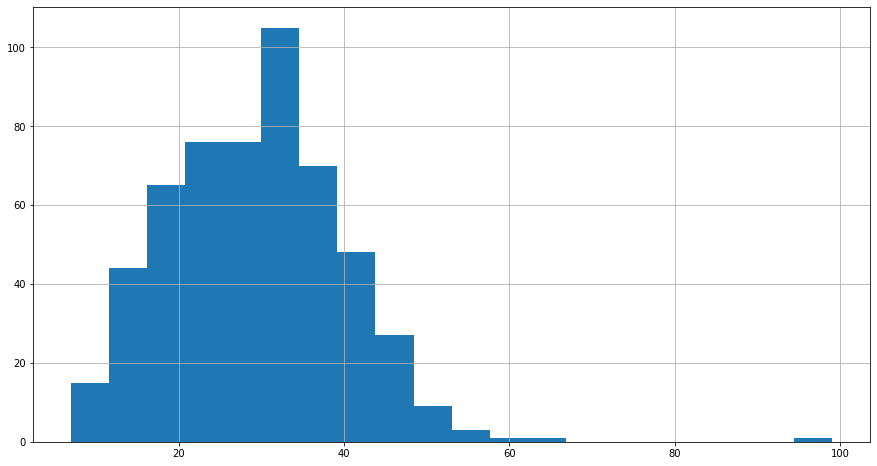

In [21]:
plt.figure(figsize=(15, 8))
df['SkinThickness'].hist(bins=20)

Since there will be little data loss in the remaining variables, we can directly drop the missing data.

In [22]:
df.dropna(inplace=True)

Step 2: Create new variables.

We could create new features according to literature informations down below:

- Glucose, which is taken in with food and gets into the bloodstream, causes blood sugar to rise.
- Insulin organizes the passage of glucose from the blood into the cells where it is used.
- Thanks to insulin, glucose in the blood is drawn into the cells and glucose in the blood accumulation is prevented.

In [23]:
df['Glucose-Insulin_BloodPressure_Ratio'] = df['Glucose'] / df['Insulin'] * df['BloodPressure']

- As a result of research, it has been concluded that people with very high blood sugar levels experience more frequent and severe skin changes than those with normal blood sugar levels. 

In [24]:
df['BloodPressure_Skin_Ratio'] = df['BloodPressure'] / df['SkinThickness']
df['Glucose-Insulin_Skin_Ratio'] = df['Glucose'] / df['Insulin'] * df['SkinThickness']

### Step 3: Perform encoding operations.

In [25]:
df = pd.get_dummies(df, columns=["Pregnancies"], drop_first=True)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose-Insulin_BloodPressure_Ratio,BloodPressure_Skin_Ratio,Glucose-Insulin_Skin_Ratio,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,148.0,72.0,35.0,125.0,33.6,0.627,50,1,85.248000,2.057143,41.440000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,44.880000,2.275862,19.720000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,89.0,66.0,23.0,94.0,28.1,0.167,21,0,62.489362,2.869565,21.776596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,1,32.619048,1.142857,28.541667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,78.0,50.0,32.0,88.0,31.0,0.248,26,1,44.318182,1.562500,28.363636,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Step 4: Standardize for numeric variables.

In [26]:
mms = MinMaxScaler()
df[num_cols] = mms.fit_transform(df[num_cols])

Step 5: Create a model.

In [27]:
y = df[TARGET]
X = df.drop([TARGET], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf_model = RandomForestClassifier(random_state=50).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [28]:
cf_matrix = confusion_matrix(y_test, y_pred)

Confusion Matrix of the Model

<AxesSubplot:>

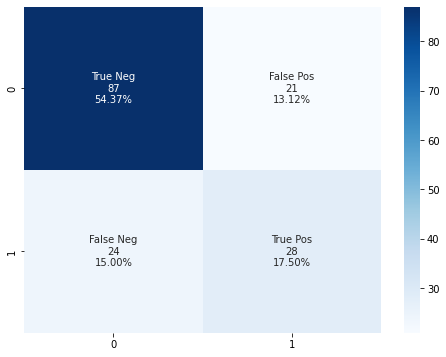

In [29]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Importance of the features

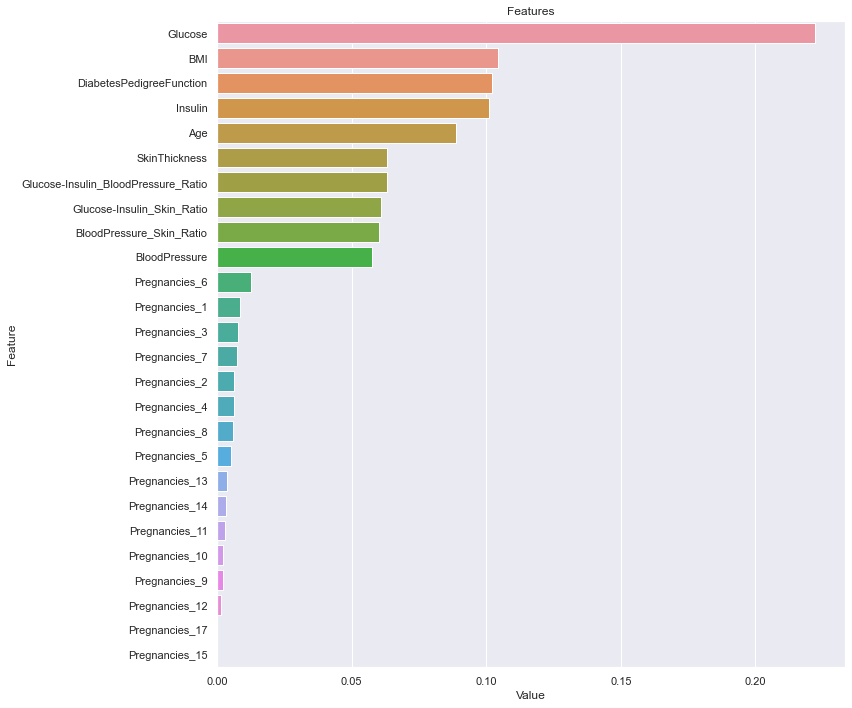

In [30]:
def plot_importance(model, features, num=len(X), save=False):
    plt.figure(figsize=(12, 10))
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X_train)

We see that our new ratio features are not have high importance but they are avarage. At this point we could consider to reseach literature and come up with other new features.